In [139]:
source("K2methods.r")
library(purrr)
library(Rgraphviz)
library(bnlearn)
library(bnstruct)

In [104]:
data = asia()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [123]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)

set.seed(9112001)
# IF YOU RUN AGAIN THE PERMUTATION CHANGES
DF = DF[, sample(ncol(DF))]
head(DF)

,V1,V2,V3,V5,V6,V8,V7,V4
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,1,1,2,2,1,1
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,2,1,1
6,2,1,2,1,1,2,2,1


In [127]:
struct = K2_algorithm(n = ncol(DF), u = 3, D = DF)

In [128]:
struct

[[1]]
[1] NA

[[2]]
[1] 1

[[3]]
[1] 1 2

[[4]]
[1] 1 3

[[5]]
[1] 3 1

[[6]]
[1] 1 3 5

[[7]]
[1] 3 1 6

[[8]]
[1] 1 6

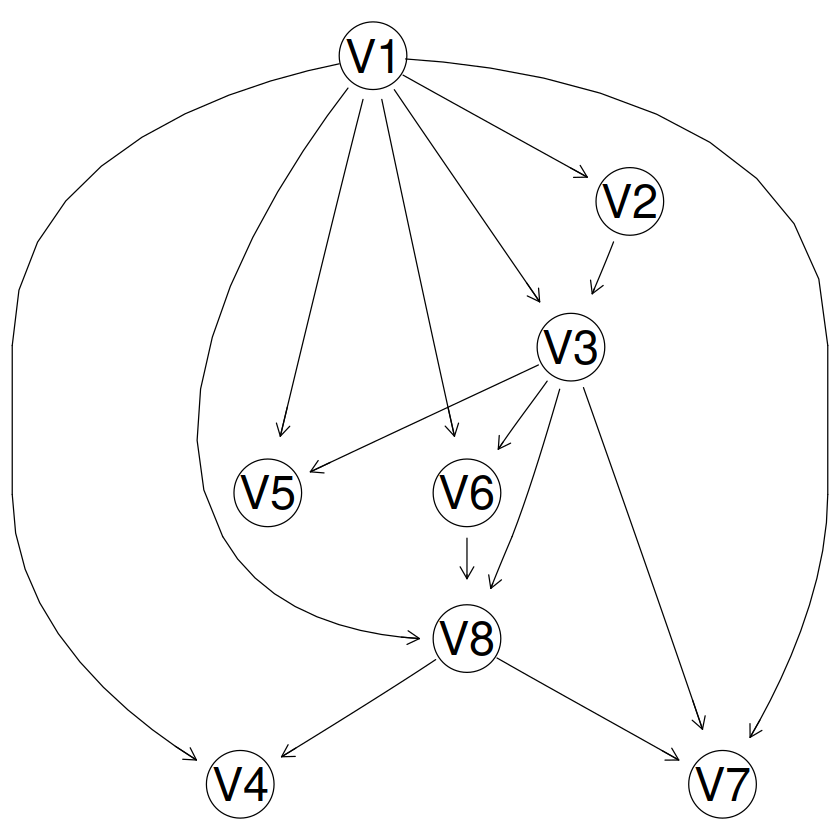

In [140]:
dag = get_dag(names(DF), struct)
graphviz.plot(dag)